In [1]:
from field_of_view import FieldOfView
from clusters import ClusterParam, Cluster

import numpy as np
from matplotlib import pyplot as plt

In [2]:
nm_per_pixel = 21.34
time_per_frame = 0.1
Tau_D_GluA1 = 150.32
Tau_D_GluA2 = 97
background_threshold = 500
homer_path = '../Examples/A1_aHomer_corrected.csv'
life_act_path = '../Examples/A1_Composite.tif'
deepd3_path = 'DeepD3_32F.h5'
points = [['GluA1', r'../Examples/A1_GluA1_corrected.csv', 'white', time_per_frame, Tau_D_GluA1],
          ['GluA2', r'../Examples/A1_GluA2_corrected.csv', 'cyan', time_per_frame, Tau_D_GluA2]]
Params = [ClusterParam(1.5, 5, 15, 60, 'GluA1')]


In [3]:
FOV_A = FieldOfView(homer_centers=homer_path, 
                    life_act=life_act_path, 
                    nm_per_pixel=nm_per_pixel,
                    points=points, 
                    Params=Params, 
                    threshold=background_threshold,
                    deepd3_model_path=deepd3_path,
                    deepd3_pred_thresh=0.3,
                    to_plot=False)

Loading Life Act...
Setting up Thresholding...
1/1 [==============================] - 4s 4s/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Loading Homer Centers...
Loading GluA1...
Loading GluA2...
Finding Clusters for: GluA1(DF=1.5, EPS_mult=5, min_samples=15, cutoff=60)...
Found 433 Clusters
Filtering Bad Spines...
Filtered 73 Spines, Finding 17 Good Spines


clusters.py (366): Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


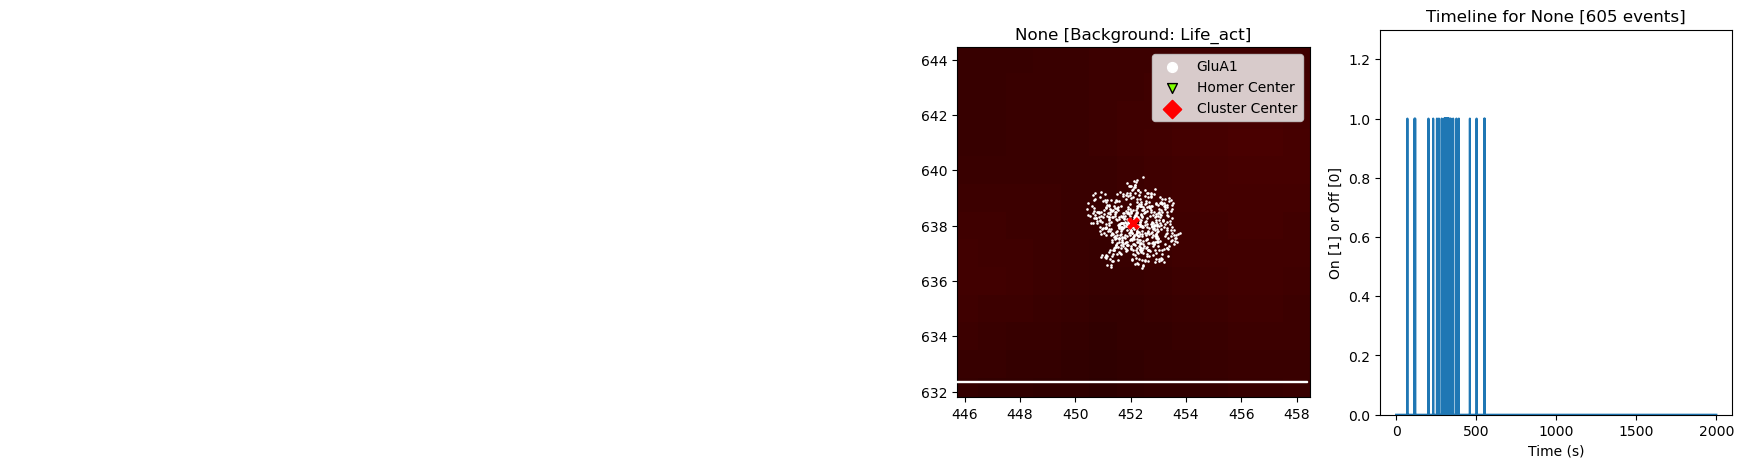

In [6]:
FOV_A.clustering_results[Params[0]][0].plot()

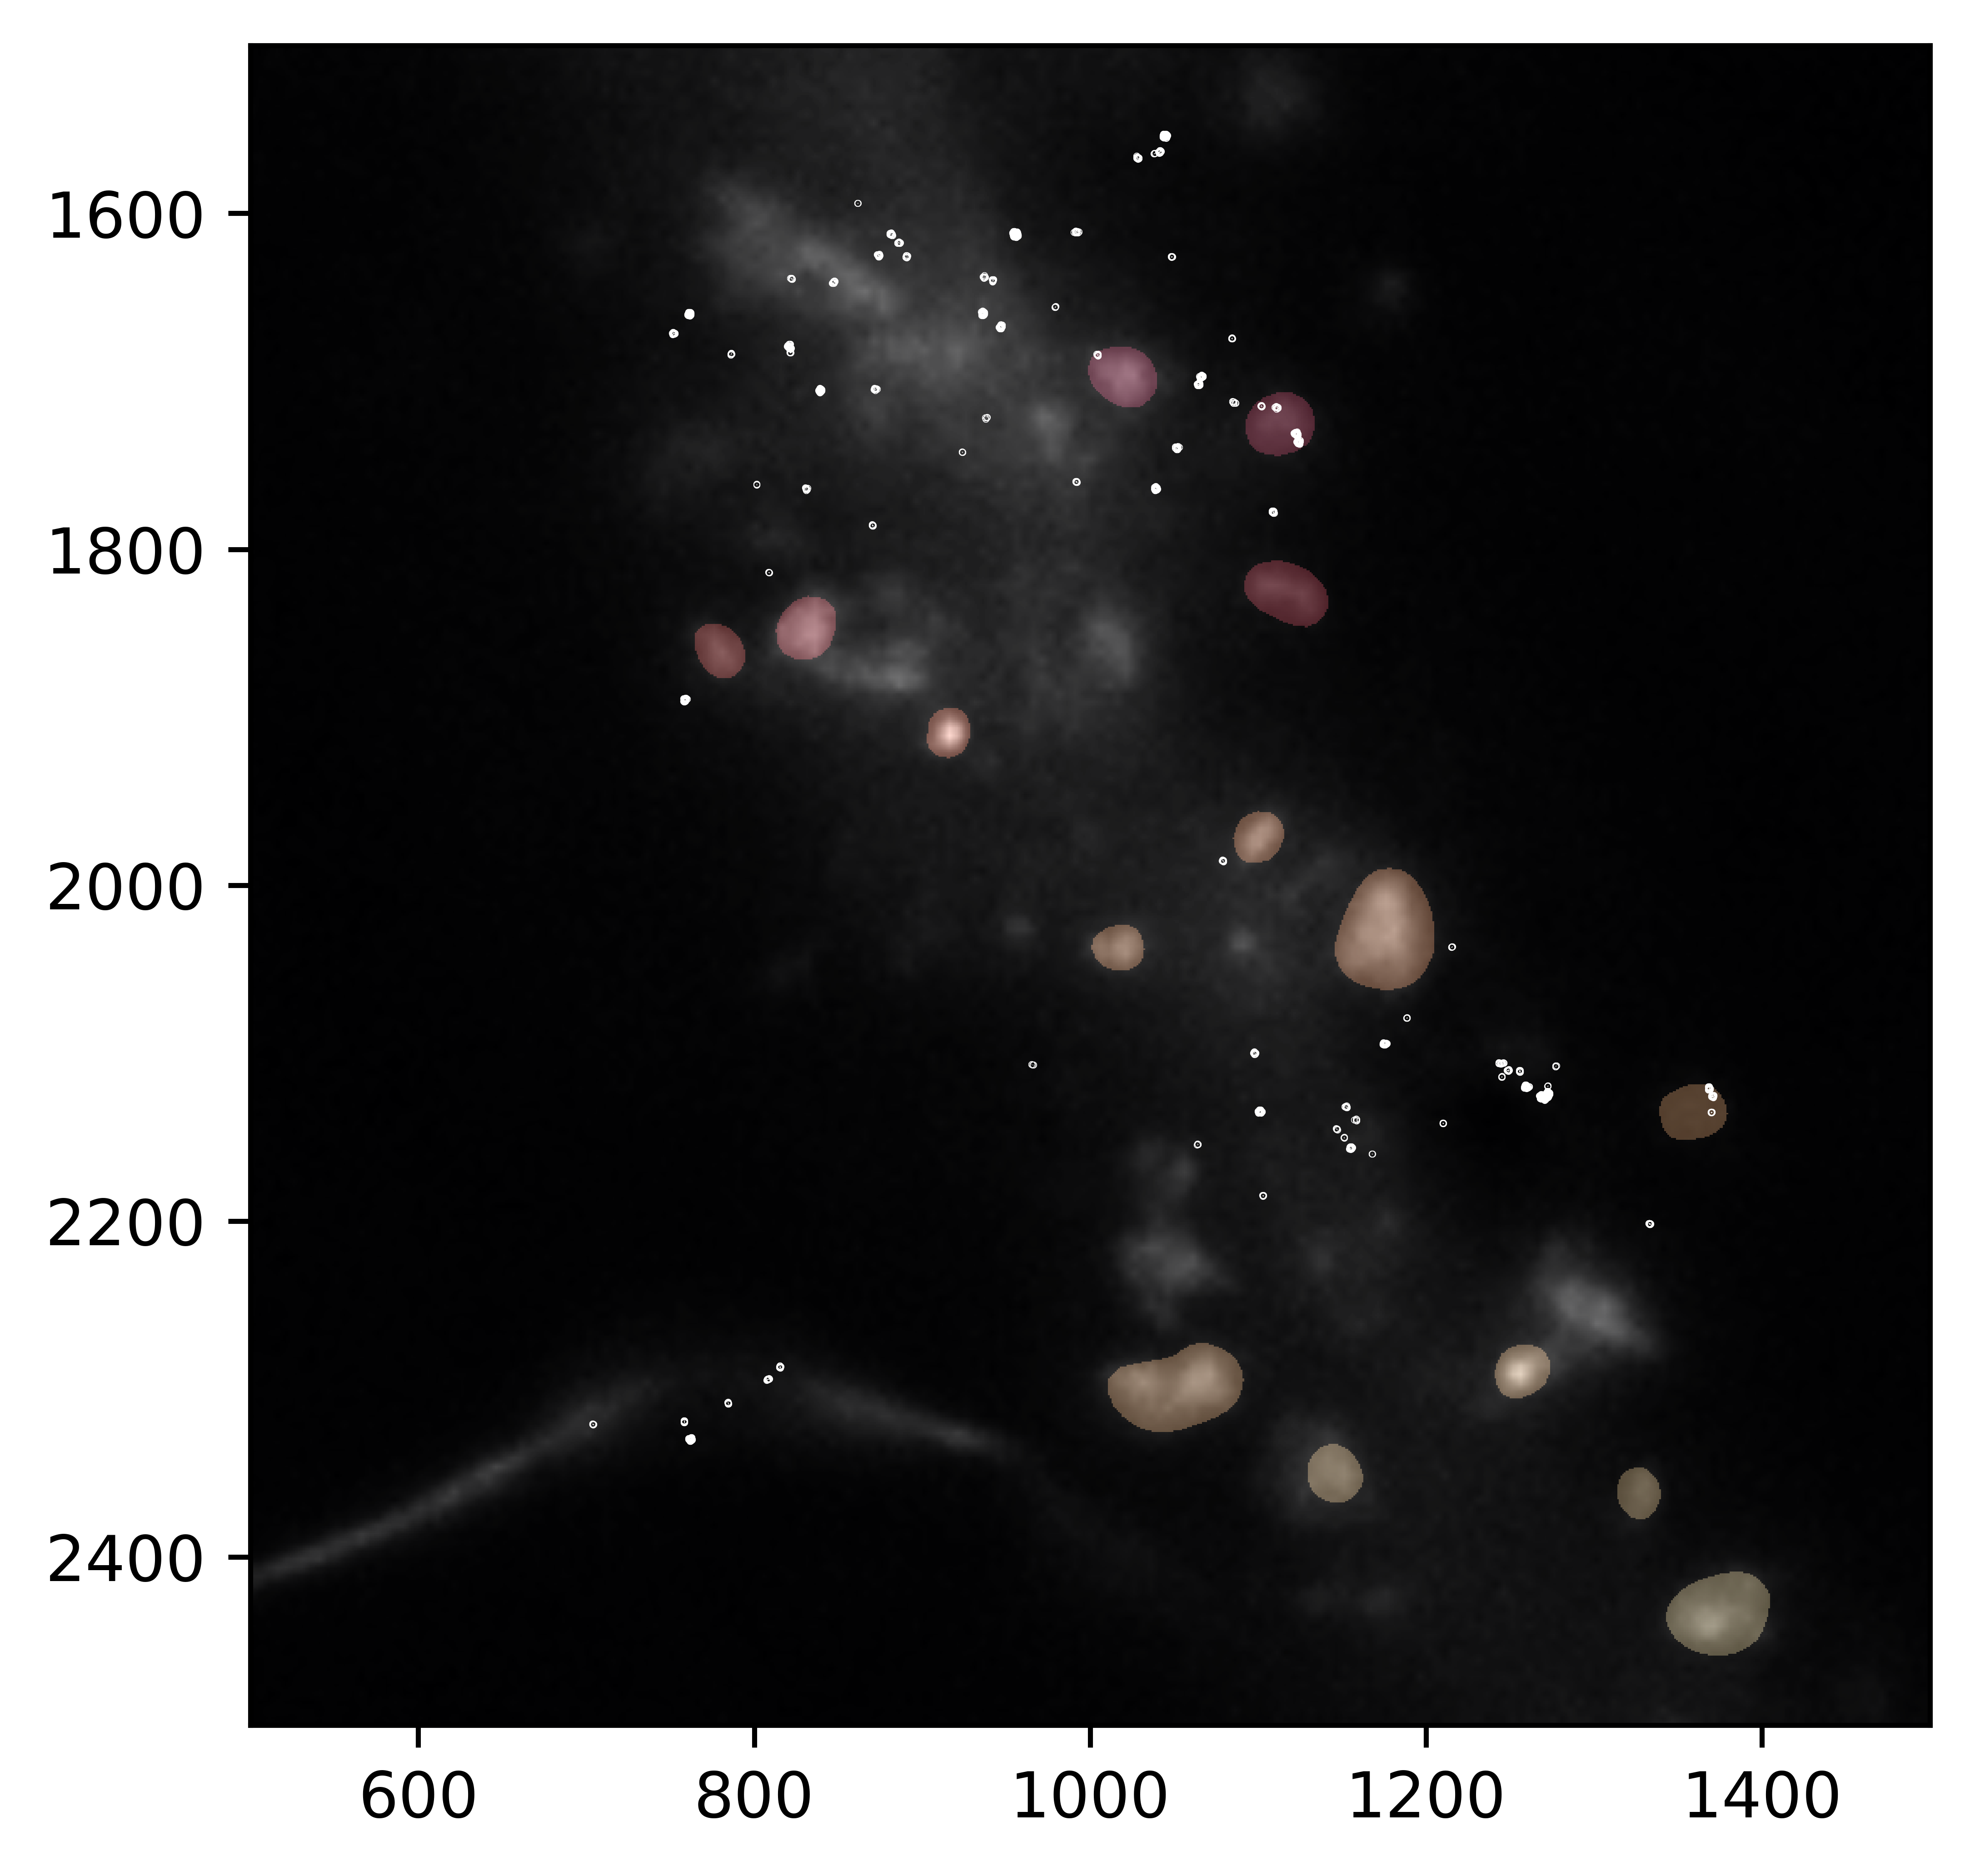

In [5]:
plt.figure(dpi=1000)
plt.imshow(FOV_A.life_act, cmap='gray')
for cluster in FOV_A.clustering_results[Params[0]]:
    cluster.add_to_plot(s=0.01)
# FOV_A.Points[1].add_to_plot(s=0.01)
plt.imshow(FOV_A.spinemap, alpha=0.3, cmap='magma')
plt.ylim(2500, 1500)
plt.xlim(500, 1500)
plt.show()

In [4]:
max_dark_time = 5000

sizes = FOV_A.get_all_cluster_sizes(Params[0], max_dark_time)
# print(sizes)
print(len(sizes))
areas = FOV_A.get_all_cluster_areas(Params[0], max_dark_time)
# print(areas)
print(len(areas))
densities = FOV_A.get_all_cluster_densities(Params[0], max_dark_time)
# print(densities)
print(len(densities))
distances_to_homer = FOV_A.get_all_distances_to_homer(Params[0], max_dark_time)
# print(distances_to_homer)
print(len(distances_to_homer))

35
35
35
35


In [9]:
def moving_average(x, y, window_size):
    """
    Calculate the moving average of the y-values, using a given window size.
    """
    # Sort x and y by x-values
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Compute moving averages
    moving_averages = []
    moving_averages_x = []

    # Use a deque (double-ended queue) to store the values in the current window
    from collections import deque
    window = deque(maxlen=window_size)  # Only holds `window_size` number of elements

    # Use the index of the sorted x-values to iterate and calculate the moving average
    for i in range(len(x_sorted)):
        # Append the next y-value to the window
        window.append(y_sorted[i])

        # Calculate the mean of the current window
        window_mean = np.mean(window)

        # Store the moving average and corresponding x-value
        moving_averages.append(window_mean)
        moving_averages_x.append(x_sorted[i])

    return moving_averages_x, moving_averages

In [ ]:
from matplotlib import pyplot as plt
distances_to_homer = FOV_A.get_all_distances_to_homer(Params[0], max_dark_time)
densities = FOV_A.get_all_cluster_densities(Params[0], max_dark_time)

greatest_density = 1000
distances_to_homer = [distances_to_homer[i] for i in range(len(distances_to_homer)) if densities[i] < greatest_density]
densities = [densities[i] for i in range(len(densities)) if densities[i] < greatest_density]

window = 50
average_distances, average_densities = moving_average(np.array(distances_to_homer), np.array(densities), window)

plt.figure()
plt.scatter(distances_to_homer, densities)
plt.plot(average_distances, average_densities, color='r', linestyle='-', linewidth=2)  # Plot the moving average line
plt.ylabel("Cluster Density subunits/micron^2")
plt.xlabel("Distance from Homer (nm)")
plt.show()

In [ ]:
plt.imshow(FOV_A.life_act)

In [19]:
FOV_A.write_clusters_to_csv(filename="Cluster.csv", Tau_D=97, 
                            Params=Params, max_dark_time=500)

TypeError: list indices must be integers or slices, not Spine

: 